In [38]:
#importing libraries
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install numpy
import numpy as np
!pip install scikit-learn
import sklearn
from sklearn import model_selection, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
!pip install statsmodels
import statsmodels.api as sm
!pip install bioinfokit
import bioinfokit
from bioinfokit import visuz
!pip install scipy
from scipy import stats
from scipy.stats import linregress
from scipy.stats import t
# Quiet deprecation warnings
import warnings
warnings.filterwarnings("ignore")

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1129)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1129)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate 

In [39]:
#read csv file
injury_data = pd.read_csv('/Users/25AlecZ/IdeaProjects/Synopsys22/multilinearRegession/gender/Injury_Listv3.csv')
injury_data.head()

,injury_interval,position_name,gender,is_lineup
0,1,defender,female,1
1,1,defender,male,0
2,1,defender,male,0
3,1,NaN,male,0
4,1,goalkeeper,female,0


In [40]:
#sort total number of injuries into intervals of 1-19
injuries = [0] * 19
injury_data.reset_index()
for index, row in injury_data.iterrows(): # 0,1,defender,female,1
    if row["injury_interval"] > 19:
        break
    injuryInterval = row["injury_interval"]
    injuries[injuryInterval-1] += 1

    Time Interval  Number of Injuries
0               1                  14
1               2                  29
2               3                  25
3               4                  30
4               5                  27
5               6                  27
6               7                  43
7               8                  30
8               9                  30
9              10                  40
10             11                  33
11             12                  38
12             13                  41
13             14                  36
14             15                  42
15             16                  43
16             17                  39
17             18                  44
18             19                  28


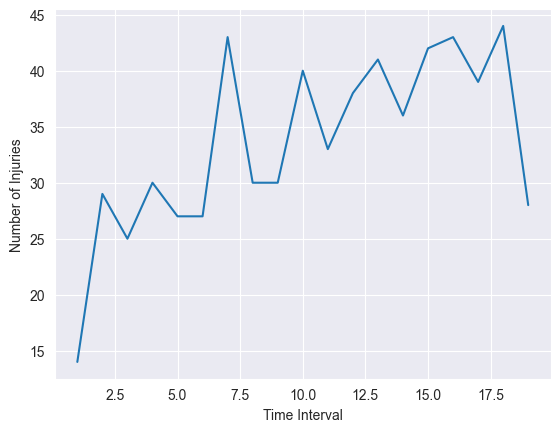

In [41]:
#plot the total number of injuries per time interval
x = np.arange(1,20)
y = injuries
total_Injuries = pd.DataFrame({"Time Interval":x, "Number of Injuries":y})
print(total_Injuries)
sns.lineplot(x = "Time Interval", y = "Number of Injuries", data=total_Injuries)
plt.show()

In [42]:
#sort total number of injuries into intervals of 1-19 by gender
femaleInjuries = [0] * 19
maleInjuries = [0] * 19
injury_data.reset_index()
for index, row in injury_data.iterrows(): # 0,1,defender,female,1
    if row["injury_interval"] > 19:
        break
    else:
        injuryInterval = row["injury_interval"]
        if row["gender"] == "female":
            femaleInjuries[injuryInterval-1] += 1
        if row["gender"] == "male":
            maleInjuries[injuryInterval-1] += 1

    Time Interval  Female  Male
0               1       8     6
1               2      18    11
2               3      18     7
3               4      14    16
4               5      14    13
5               6      15    11
6               7      24    18
7               8      16    14
8               9      14    16
9              10      20    20
10             11      17    15
11             12      18    20
12             13      19    21
13             14      24    11
14             15      20    21
15             16      20    23
16             17      24    15
17             18      24    20
18             19      17    11


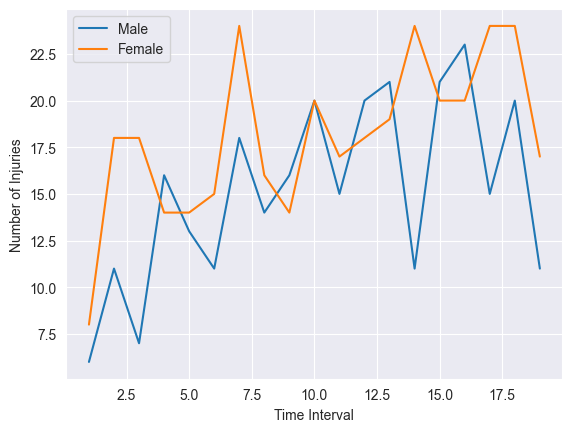

In [43]:
#plot two lines comparing males vs females total number of injuries per time interval
x = np.arange(1,20)
a = femaleInjuries
b = maleInjuries
injuries_Sorted_Gender = pd.DataFrame({
    'Time Interval': x,
    'Female': a,
    'Male': b})
print(injuries_Sorted_Gender)
injuries_Sorted_Gender.plot(x = "Time Interval", y = ["Male", "Female"])
plt.ylabel("Number of Injuries")
plt.show()

In [44]:
#sort total number of injuries into intervals of 1-19 by nonlineup and male gender
#1 is lineup, 0 is not lineup
inLineupMale = [0] * 19
notInLineupMale = [0] * 19
injury_data.reset_index()
for index, row in injury_data.iterrows(): # 0,1,defender,female,1
    if row["injury_interval"] > 19:
        break
    injuryInterval = row["injury_interval"]
    if row["gender"] == "male":
        if row["is_lineup"] == 1:
            inLineupMale[injuryInterval-1] += 1
        elif row["is_lineup"] == 0:
            notInLineupMale[injuryInterval-1] += 1

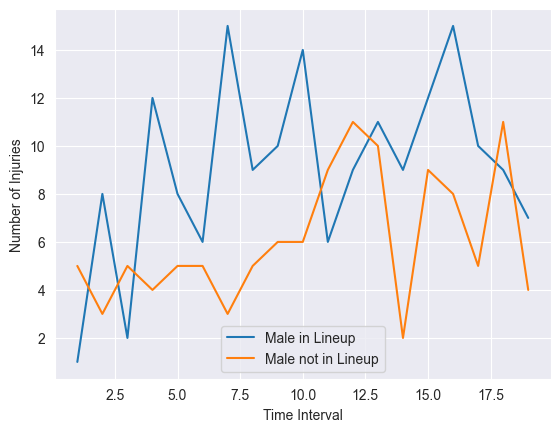

In [45]:
#plot male graph of difference between lineup and nonlineup
x = np.arange(1,20)
a = inLineupMale
b = notInLineupMale
injuries_Sorted_Male_Lineup = pd.DataFrame({
    'Time Interval': x,
    'Male in Lineup': a,
    'Male not in Lineup': b})
injuries_Sorted_Male_Lineup.plot(x = "Time Interval", y = ["Male in Lineup", "Male not in Lineup"])
plt.ylabel("Number of Injuries")
plt.show()

In [46]:
#sort total number of injuries into intervals of 1-19 by nonlineup and female gender
#1 is lineup, 0 is not lineup
inLineupFemale = [0] * 19
notInLineupFemale = [0] * 19
injury_data.reset_index()
for index, row in injury_data.iterrows():  # 0,1,defender,female,1
    if row["injury_interval"] > 19:
        break
    injuryInterval = row["injury_interval"]
    if row["gender"] == "female":
        if row["is_lineup"] == 1:
            inLineupFemale[injuryInterval - 1] += 1
        elif row["is_lineup"] == 0:
            notInLineupFemale[injuryInterval - 1] += 1

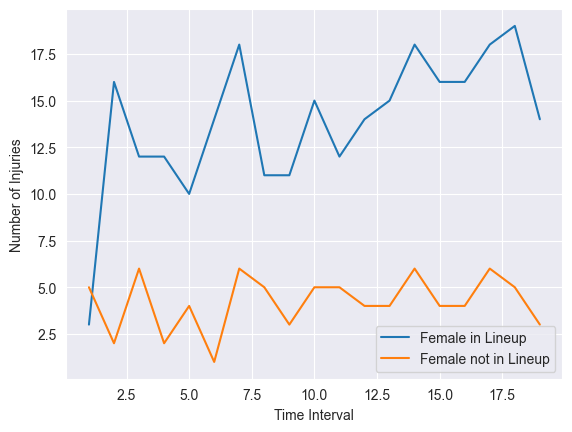

In [47]:
#plot female graph of difference between lineup and nonlineup
x = np.arange(1,20)
a = inLineupFemale
b = notInLineupFemale
injuries_Sorted_Female_Lineup = pd.DataFrame({
    'Time Interval': x,
    'Female in Lineup': a,
    'Female not in Lineup': b})
injuries_Sorted_Female_Lineup.plot(x="Time Interval", y=["Female in Lineup", "Female not in Lineup"])
plt.ylabel("Number of Injuries")
plt.show()

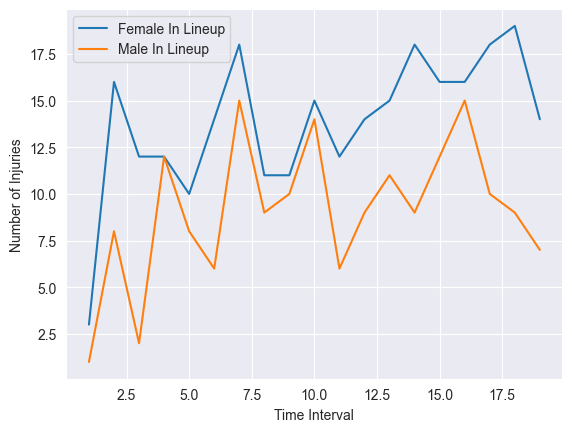

In [48]:
#comparing female to male lineup
x = np.arange(1,20)
a = inLineupFemale
b = inLineupMale
injuries_Sorted_Gender_Lineup = pd.DataFrame({
    'Time Interval': x,
    'Female In Lineup': a,
    'Male In Lineup': b})
injuries_Sorted_Gender_Lineup.plot(x="Time Interval", y=["Female In Lineup", "Male In Lineup"])
plt.ylabel("Number of Injuries")
plt.show()

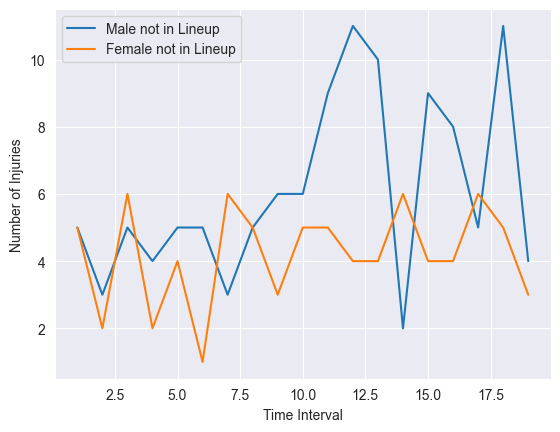

In [49]:
#comparing female to male non lineup
x = np.arange(1,20)
a = notInLineupFemale
b = notInLineupMale
injuries_Sorted_Gender_NotLineup = pd.DataFrame({
    'Time Interval': x,
    'Female not in Lineup': a,
    'Male not in Lineup': b})
injuries_Sorted_Gender_NotLineup.plot(x="Time Interval", y=["Male not in Lineup", "Female not in Lineup"])
plt.ylabel("Number of Injuries")
plt.show()

In [50]:
#sort total number of injuries into intervals of 1-19 by nonlineup and female gender
#1 is lineup, 0 is not lineup
goalkeeperFemale = [0] * 19
defenderFemale = [0] * 19
midfielderFemale = [0] * 19
attackerFemale = [0] * 19
injury_data.reset_index()
for index, row in injury_data.iterrows():  # 0,1,defender,female,1
    if row["injury_interval"] > 19:
        break
    injuryInterval = row["injury_interval"]
    if row["gender"] == "female":
        if row["position_name"] == "goalkeeper":
            goalkeeperFemale[injuryInterval - 1] += 1
        elif row["position_name"] == "defender":
            defenderFemale[injuryInterval - 1] += 1
        elif row["position_name"] == "midfielder":
            midfielderFemale[injuryInterval - 1] += 1
        elif row["position_name"] == "attacker":
            attackerFemale[injuryInterval - 1] += 1

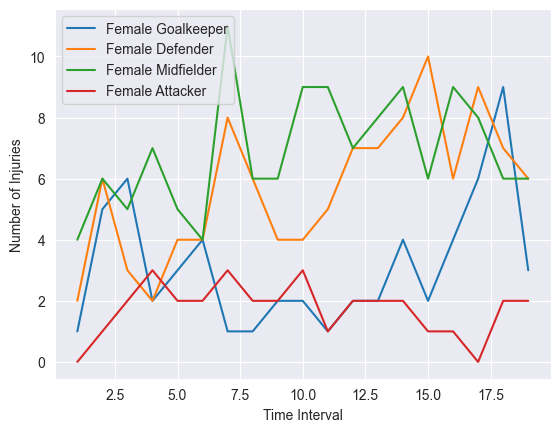

In [51]:
#comparing female to male non lineup
x = np.arange(1,20)
a = goalkeeperFemale
b = defenderFemale
c = midfielderFemale
d = attackerFemale
injuries_Sorted_Female_Position = pd.DataFrame({
    'Time Interval': x,
    'Female Goalkeeper': a,
    'Female Defender': b,
    'Female Midfielder': c,
    'Female Attacker': d})
injuries_Sorted_Female_Position.plot(x="Time Interval", y=["Female Goalkeeper", "Female Defender", "Female Midfielder", "Female Attacker"])
plt.ylabel("Number of Injuries")
plt.show()

In [52]:
#sort total number of injuries into intervals of 1-19 by nonlineup and female gender
#1 is lineup, 0 is not lineup
goalkeeperMale = [0] * 19
defenderMale = [0] * 19
midfielderMale = [0] * 19
attackerMale = [0] * 19
injury_data.reset_index()
for index, row in injury_data.iterrows():  # 0,1,defender,female,1
    if row["injury_interval"] > 19:
        break
    injuryInterval = row["injury_interval"]
    if row["gender"] == "male":
        if row["position_name"] == "goalkeeper":
            goalkeeperMale[injuryInterval - 1] += 1
        elif row["position_name"] == "defender":
            defenderMale[injuryInterval - 1] += 1
        elif row["position_name"] == "midfielder":
            midfielderMale[injuryInterval - 1] += 1
        elif row["position_name"] == "attacker":
            attackerMale[injuryInterval - 1] += 1

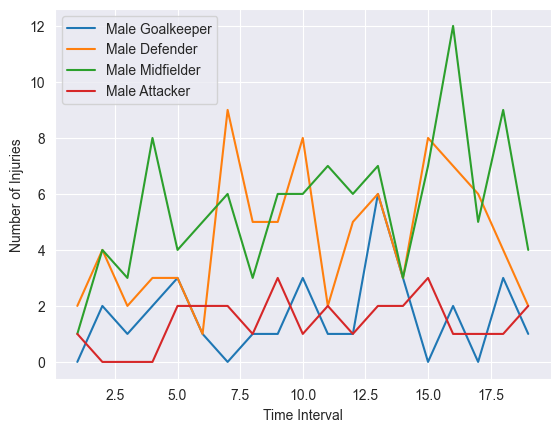

In [53]:
#comparing female to male non lineup
x = np.arange(1,20)
a = goalkeeperMale
b = defenderMale
c = midfielderMale
d = attackerMale
injuries_Sorted_Male_Position = pd.DataFrame({
    'Time Interval': x,
    'Male Goalkeeper': a,
    'Male Defender': b,
    'Male Midfielder': c,
    'Male Attacker': d})
injuries_Sorted_Male_Position.plot(x="Time Interval", y=["Male Goalkeeper", "Male Defender", "Male Midfielder", "Male Attacker"])
plt.ylabel("Number of Injuries")
plt.show()

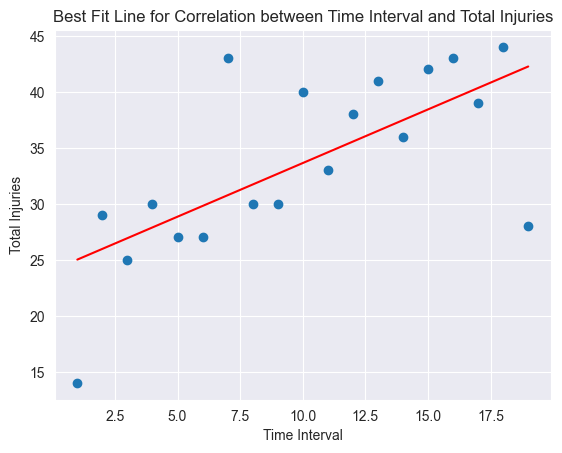

In [54]:
#starting linear regression
x = total_Injuries[["Time Interval"]]
y = total_Injuries[["Number of Injuries"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red')
plt.title('Best Fit Line for Correlation between Time Interval and Total Injuries')
plt.scatter(x, y)
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

In [55]:
x = total_Injuries["Time Interval"]
y = total_Injuries["Number of Injuries"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
print(linregress(x,y))
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts*res.intercept_stderr:.6f}")

R-squared: 0.457809
LinregressResult(slope=0.9578947368421054, intercept=24.052631578947363, rvalue=0.6766157704079663, pvalue=0.0014663786488671334, stderr=0.25282929999220816, intercept_stderr=2.882697545961334)
slope (95%): 0.957895 +/- 0.533423
intercept (95%): 24.052632 +/- 6.081960


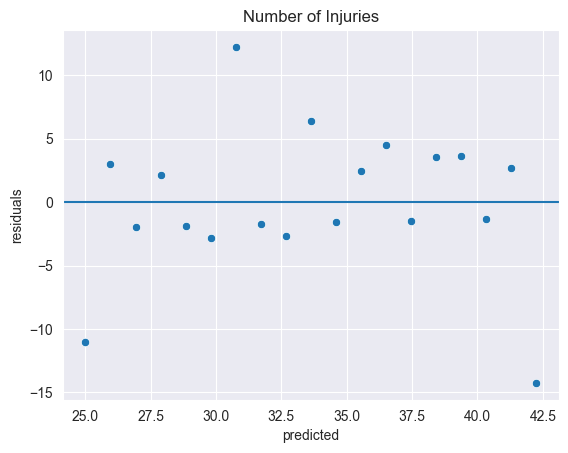

In [56]:
x = total_Injuries[["Time Interval"]]
y = total_Injuries[["Number of Injuries"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
total_Injuries["predicted"] = reg.predict(x)
total_Injuries["residuals"] = reg.resid
sns.scatterplot(data=total_Injuries, x="predicted", y="residuals")
plt.title("Number of Injuries")
plt.axhline(y=0)

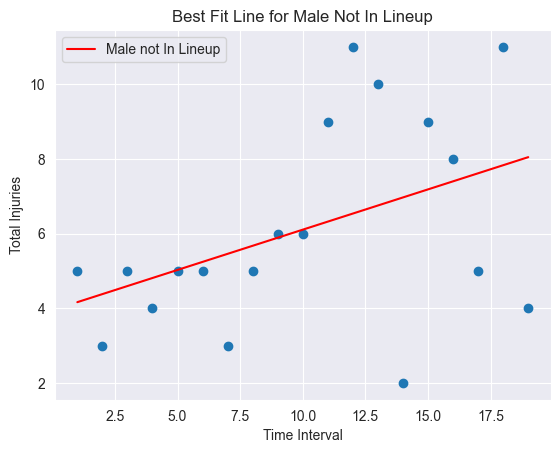

In [57]:
x = injuries_Sorted_Gender_NotLineup[["Time Interval"]]
y = injuries_Sorted_Gender_NotLineup[["Male not in Lineup"]]
multilinear = LinearRegression()
multilinear.fit(x,y)
y_pred = multilinear.predict(x)
plt.plot(x, y_pred, color='red', label = "Male not In Lineup")
plt.title('Best Fit Line for Male Not In Lineup')
plt.legend (loc=2)
plt.scatter(x, y)
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

In [58]:
x = injuries_Sorted_Gender_NotLineup["Time Interval"]
y = injuries_Sorted_Gender_NotLineup["Male not in Lineup"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
print(linregress(x,y))
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts*res.intercept_stderr:.6f}")

R-squared: 0.195465
LinregressResult(slope=0.2157894736842105, intercept=3.9473684210526323, rvalue=0.4421143701340975, pvalue=0.05805097641951296, stderr=0.10618021579911587, intercept_stderr=1.2106407268587513)
slope (95%): 0.215789 +/- 0.224021
intercept (95%): 3.947368 +/- 2.554229


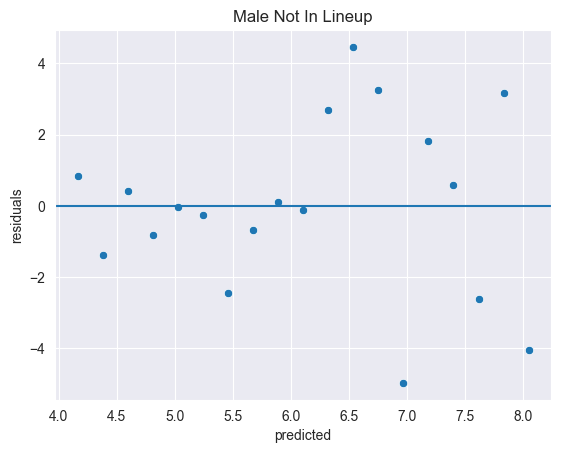

In [59]:
x = injuries_Sorted_Gender_NotLineup[["Time Interval"]]
y = injuries_Sorted_Gender_NotLineup[["Male not in Lineup"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Gender_NotLineup["predicted"] = reg.predict(x)
injuries_Sorted_Gender_NotLineup["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Gender_NotLineup, x="predicted", y="residuals")
plt.title("Male Not In Lineup")
plt.axhline(y=0)

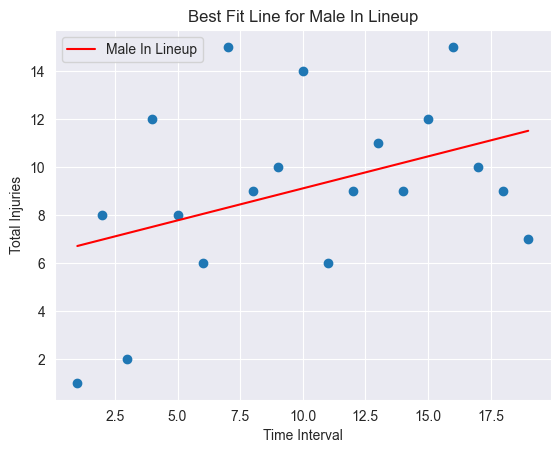

In [60]:
x = injuries_Sorted_Gender_Lineup[["Time Interval"]]
y = injuries_Sorted_Gender_Lineup[["Male In Lineup"]]
multilinear = LinearRegression()
multilinear.fit(x,y)
y_pred = multilinear.predict(x)
plt.plot(x, y_pred, color='red', label = "Male In Lineup")
plt.title('Best Fit Line for Male In Lineup')
plt.legend (loc=2)
plt.scatter(x, y)
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

In [61]:
x = injuries_Sorted_Gender_Lineup["Time Interval"]
y = injuries_Sorted_Gender_Lineup["Male In Lineup"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
print(linregress(x,y))
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts*res.intercept_stderr:.6f}")

R-squared: 0.157234
LinregressResult(slope=0.26666666666666666, intercept=6.43859649122807, rvalue=0.3965277358145055, pvalue=0.09280097003182572, stderr=0.14973528080908644, intercept_stderr=1.7072448744883892)
slope (95%): 0.266667 +/- 0.315914
intercept (95%): 6.438596 +/- 3.601972


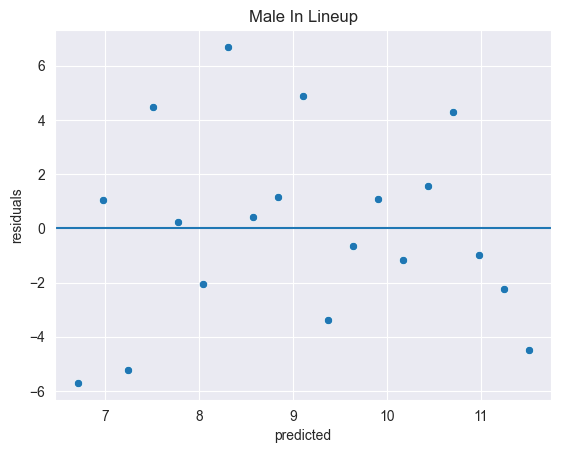

In [62]:
x = injuries_Sorted_Gender_Lineup[["Time Interval"]]
y = injuries_Sorted_Gender_Lineup[["Male In Lineup"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Gender_NotLineup["predicted"] = reg.predict(x)
injuries_Sorted_Gender_NotLineup["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Gender_NotLineup, x="predicted", y="residuals")
plt.title("Male In Lineup")
plt.axhline(y=0)

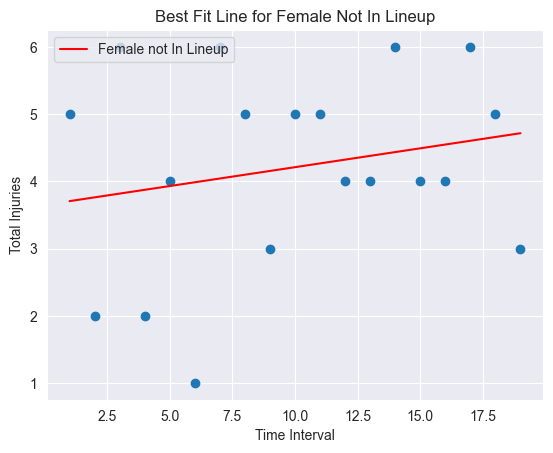

In [63]:
x = injuries_Sorted_Gender_NotLineup[["Time Interval"]]
y = injuries_Sorted_Gender_NotLineup[["Female not in Lineup"]]
multilinear = LinearRegression()
multilinear.fit(x,y)
y_pred = multilinear.predict(x)
plt.plot(x, y_pred, color='red', label = "Female not In Lineup")
plt.title('Best Fit Line for Female Not In Lineup')
plt.legend (loc=2)
plt.scatter(x, y)
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

In [64]:
x = injuries_Sorted_Gender_NotLineup["Time Interval"]
y = injuries_Sorted_Gender_NotLineup["Female not in Lineup"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.045878
LinregressResult(slope=0.05614035087719298, intercept=3.6491228070175437, rvalue=0.21419182104066634, pvalue=0.37856682916942774, stderr=0.06209400934693531, intercept_stderr=0.7079806350325182)
slope (95%): 0.056140 +/- 0.131007
intercept (95%): 3.649123 +/- 1.493709


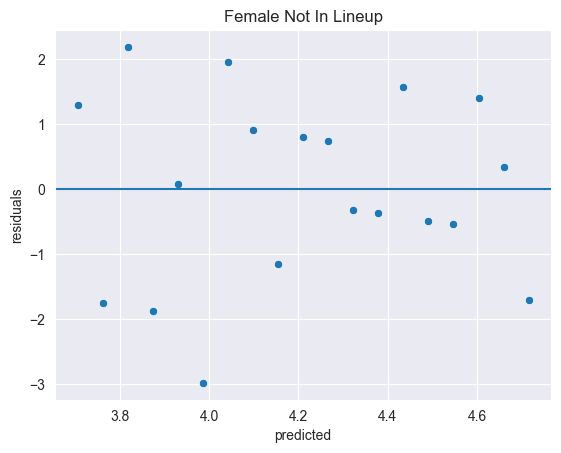

In [65]:
x = injuries_Sorted_Gender_NotLineup[["Time Interval"]]
y = injuries_Sorted_Gender_NotLineup[["Female not in Lineup"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Gender_NotLineup["predicted"] = reg.predict(x)
injuries_Sorted_Gender_NotLineup["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Gender_NotLineup, x="predicted", y="residuals")
plt.title("Female Not In Lineup")
plt.axhline(y=0)

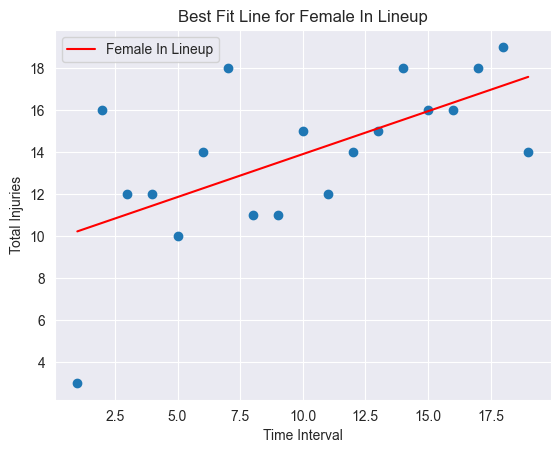

In [66]:
x = injuries_Sorted_Gender_Lineup[["Time Interval"]]
y = injuries_Sorted_Gender_Lineup[["Female In Lineup"]]
multilinear = LinearRegression()
multilinear.fit(x,y)
y_pred = multilinear.predict(x)
plt.plot(x, y_pred, color='red', label = "Female In Lineup")
plt.title('Best Fit Line for Female In Lineup')
plt.legend (loc=2)
plt.scatter(x, y)
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

In [67]:
x = injuries_Sorted_Gender_Lineup["Time Interval"]
y = injuries_Sorted_Gender_Lineup["Female In Lineup"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.375287
LinregressResult(slope=0.40877192982456134, intercept=9.80701754385965, rvalue=0.6126066271105008, pvalue=0.005296343332951316, stderr=0.1279131598945521, intercept_stderr=1.4584344145854493)
slope (95%): 0.408772 +/- 0.269873
intercept (95%): 9.807018 +/- 3.077028


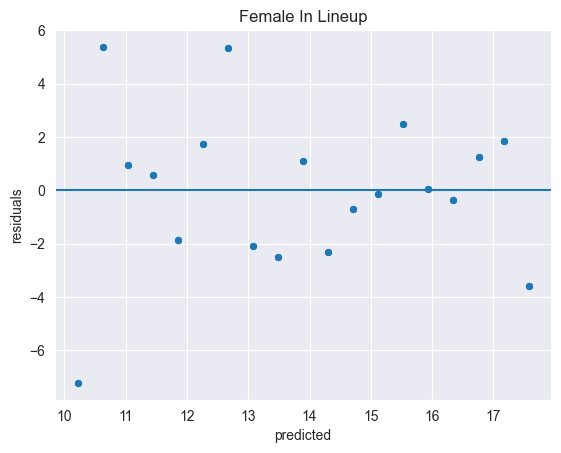

In [68]:
x = injuries_Sorted_Gender_Lineup[["Time Interval"]]
y = injuries_Sorted_Gender_Lineup[["Female In Lineup"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Gender_NotLineup["predicted"] = reg.predict(x)
injuries_Sorted_Gender_NotLineup["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Gender_NotLineup, x="predicted", y="residuals")
plt.title("Female In Lineup")
plt.axhline(y=0)

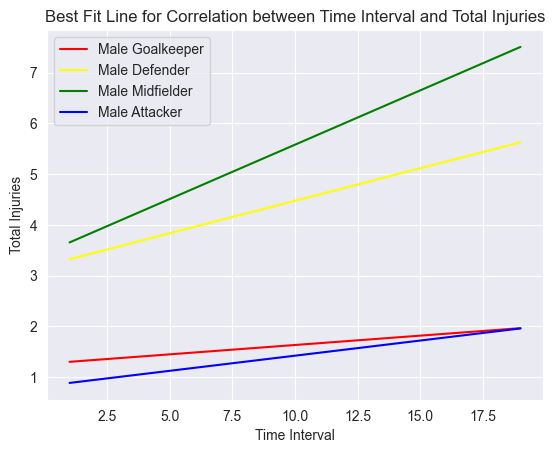

In [69]:
x = injuries_Sorted_Male_Position[["Time Interval"]]
y = injuries_Sorted_Male_Position[["Male Goalkeeper"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red', label = "Male Goalkeeper")
y = injuries_Sorted_Male_Position[["Male Defender"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='yellow', label = "Male Defender")
y = injuries_Sorted_Male_Position[["Male Midfielder"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='green', label = "Male Midfielder")
y = injuries_Sorted_Male_Position[["Male Attacker"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='blue', label = "Male Attacker")
plt.legend (loc=2)
plt.title('Best Fit Line for Correlation between Time Interval and Total Injuries')
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

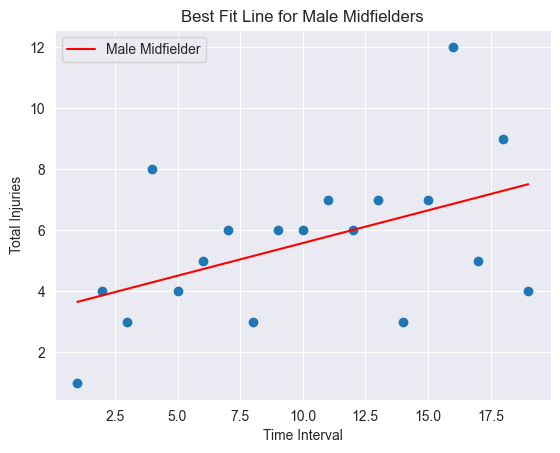

In [71]:
x = injuries_Sorted_Male_Position[["Time Interval"]]
y = injuries_Sorted_Male_Position[["Male Midfielder"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red', label = "Male Midfielder")

plt.title('Best Fit Line for Male Midfielders')
plt.legend (loc=2)
plt.scatter(x, y)
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

In [158]:
x = injuries_Sorted_Male_Position["Time Interval"]
y = injuries_Sorted_Male_Position["Male Goalkeeper"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.019141
LinregressResult(slope=0.0368421052631579, intercept=1.263157894736842, rvalue=0.13834964763236662, pvalue=0.5721829804877907, stderr=0.06396542572708418, intercept_stderr=0.7293180647002554)
slope (95%): 0.036842 +/- 0.134955
intercept (95%): 1.263158 +/- 1.538727


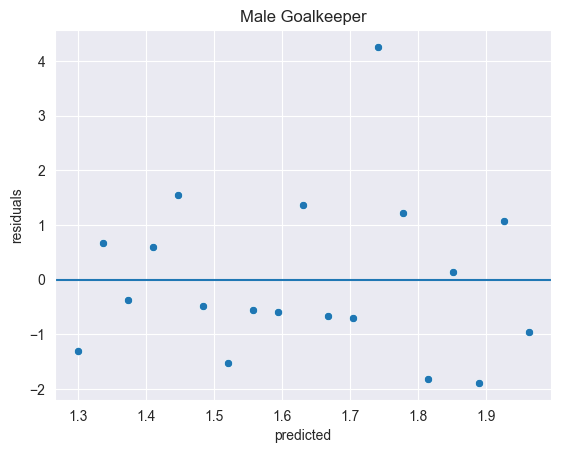

In [90]:
x = injuries_Sorted_Male_Position[["Time Interval"]]
y = injuries_Sorted_Male_Position[["Male Goalkeeper"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Male_Position["predicted"] = reg.predict(x)
injuries_Sorted_Male_Position["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Male_Position, x="predicted", y="residuals")
plt.title("Male Goalkeeper")
plt.axhline(y=0)


In [159]:
x = injuries_Sorted_Male_Position["Time Interval"]
y = injuries_Sorted_Male_Position["Male Defender"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.092807
LinregressResult(slope=0.12807017543859653, intercept=3.1929824561403506, rvalue=0.30464304388364855, pvalue=0.20473953921075086, stderr=0.09711404214881329, intercept_stderr=1.107270442901188)
slope (95%): 0.128070 +/- 0.204893
intercept (95%): 3.192982 +/- 2.336136


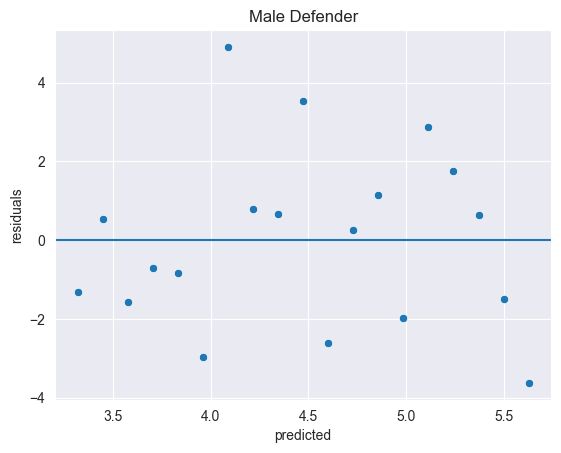

In [92]:
x = injuries_Sorted_Male_Position[["Time Interval"]]
y = injuries_Sorted_Male_Position[["Male Defender"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Male_Position["predicted"] = reg.predict(x)
injuries_Sorted_Male_Position["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Male_Position, x="predicted", y="residuals")
plt.title("Male Defender")
plt.axhline(y=0)

In [160]:
x = injuries_Sorted_Male_Position["Time Interval"]
y = injuries_Sorted_Male_Position["Male Midfielder"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.227793
LinregressResult(slope=0.21403508771929827, intercept=3.4385964912280693, rvalue=0.4772767355932373, pvalue=0.038790352240889475, stderr=0.09557781383772795, intercept_stderr=1.0897547452247773)
slope (95%): 0.214035 +/- 0.201652
intercept (95%): 3.438596 +/- 2.299182


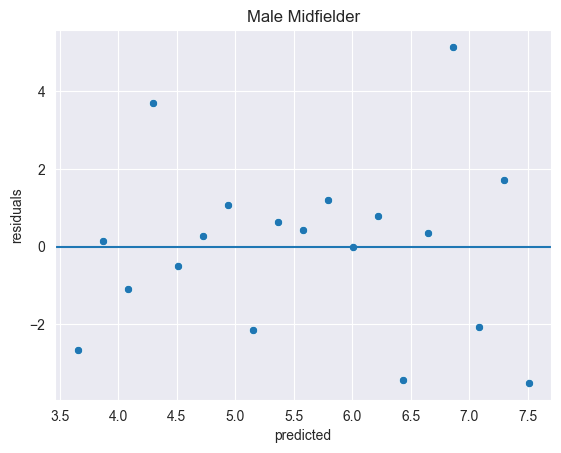

In [93]:
x = injuries_Sorted_Male_Position[["Time Interval"]]
y = injuries_Sorted_Male_Position[["Male Midfielder"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Male_Position["predicted"] = reg.predict(x)
injuries_Sorted_Male_Position["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Male_Position, x="predicted", y="residuals")
plt.title("Male Midfielder")
plt.axhline(y=0)

In [161]:
x = injuries_Sorted_Male_Position["Time Interval"]
y = injuries_Sorted_Male_Position["Male Attacker"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.138609
LinregressResult(slope=0.059649122807017535, intercept=0.824561403508772, rvalue=0.3723024478966424, pvalue=0.11648425127970125, stderr=0.03606482635324283, intercept_stderr=0.41120228718435237)
slope (95%): 0.059649 +/- 0.076090
intercept (95%): 0.824561 +/- 0.867561


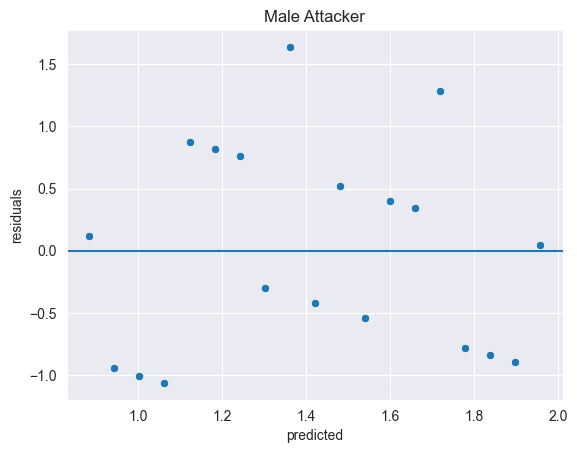

In [96]:
x = injuries_Sorted_Male_Position[["Time Interval"]]
y = injuries_Sorted_Male_Position[["Male Attacker"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Male_Position["predicted"] = reg.predict(x)
injuries_Sorted_Male_Position["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Male_Position, x="predicted", y="residuals")
plt.title("Male Attacker")
plt.axhline(y=0)

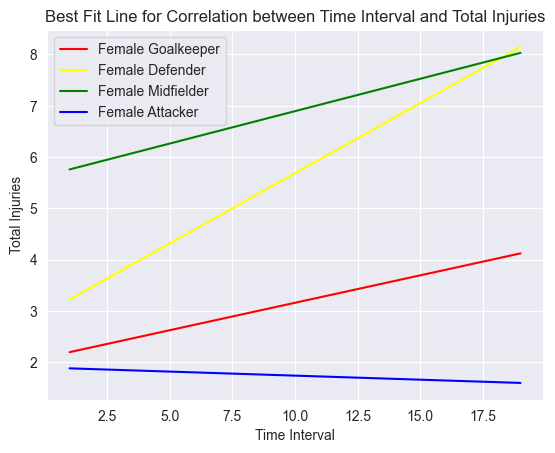

In [163]:
#starting linear regression
x = injuries_Sorted_Female_Position[["Time Interval"]]
y = injuries_Sorted_Female_Position[["Female Goalkeeper"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red', label = "Female Goalkeeper")
y = injuries_Sorted_Female_Position[["Female Defender"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='yellow', label = "Female Defender")
y = injuries_Sorted_Female_Position[["Female Midfielder"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='green', label = "Female Midfielder")
y = injuries_Sorted_Female_Position[["Female Attacker"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='blue', label = "Female Attacker")
plt.legend (loc=2)
plt.title('Best Fit Line for Correlation between Time Interval and Total Injuries')
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

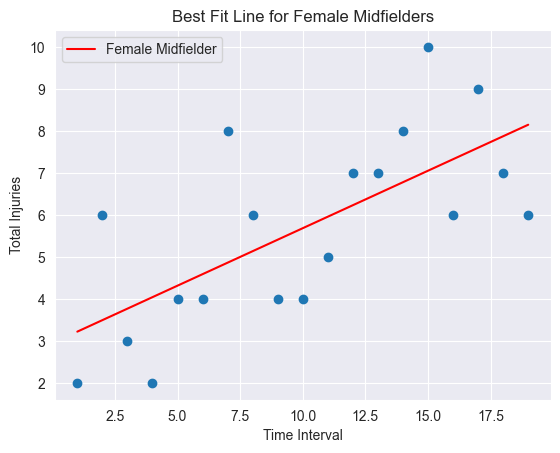

In [73]:
x = injuries_Sorted_Female_Position[["Time Interval"]]
y = injuries_Sorted_Female_Position[["Female Defender"]]
linear = LinearRegression()
linear.fit(x,y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red', label = "Female Midfielder")

plt.title('Best Fit Line for Female Midfielders')
plt.legend (loc=2)
plt.scatter(x, y)
plt.xlabel('Time Interval') # set the labels of the x and y axes
plt.ylabel('Total Injuries')
plt.show()

In [165]:
x = injuries_Sorted_Female_Position["Time Interval"]
y = injuries_Sorted_Female_Position["Female Goalkeeper"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.079103
LinregressResult(slope=0.10701754385964911, intercept=2.0877192982456143, rvalue=0.2812523620460148, pvalue=0.24342999735018242, stderr=0.08856046637026473, intercept_stderr=1.009744673906945)
slope (95%): 0.107018 +/- 0.186846
intercept (95%): 2.087719 +/- 2.130375


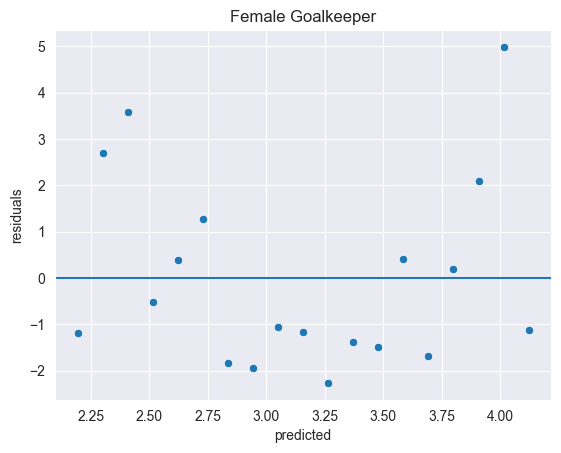

In [101]:
x = injuries_Sorted_Female_Position[["Time Interval"]]
y = injuries_Sorted_Female_Position[["Female Goalkeeper"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Male_Position["predicted"] = reg.predict(x)
injuries_Sorted_Male_Position["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Male_Position, x="predicted", y="residuals")
plt.title("Female Goalkeeper")
plt.axhline(y=0)

In [166]:
x = injuries_Sorted_Female_Position["Time Interval"]
y = injuries_Sorted_Female_Position["Female Defender"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.463543
LinregressResult(slope=0.27368421052631575, intercept=2.947368421052632, rvalue=0.6808398175362962, pvalue=0.0013328723494373423, stderr=0.07140816145781441, intercept_stderr=0.8141783084571143)
slope (95%): 0.273684 +/- 0.150658
intercept (95%): 2.947368 +/- 1.717766


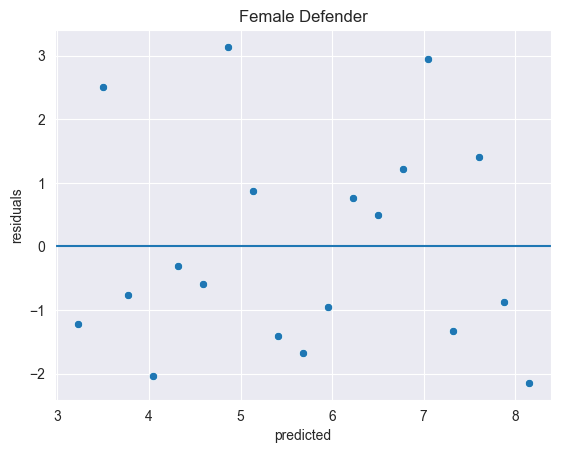

In [102]:
x = injuries_Sorted_Female_Position[["Time Interval"]]
y = injuries_Sorted_Female_Position[["Female Defender"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Male_Position["predicted"] = reg.predict(x)
injuries_Sorted_Male_Position["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Male_Position, x="predicted", y="residuals")
plt.title("Female Defender")
plt.axhline(y=0)

In [167]:
x = injuries_Sorted_Female_Position["Time Interval"]
y = injuries_Sorted_Female_Position["Female Midfielder"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.138240
LinregressResult(slope=0.12631578947368421, intercept=5.631578947368421, rvalue=0.371806401235912, pvalue=0.11701027362904223, stderr=0.07649084935667128, intercept_stderr=0.8721298668143679)
slope (95%): 0.126316 +/- 0.161382
intercept (95%): 5.631579 +/- 1.840033


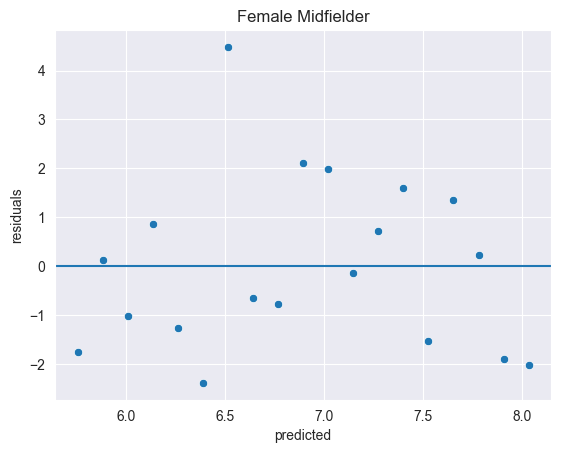

In [103]:
x = injuries_Sorted_Female_Position[["Time Interval"]]
y = injuries_Sorted_Female_Position[["Female Midfielder"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Male_Position["predicted"] = reg.predict(x)
injuries_Sorted_Male_Position["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Male_Position, x="predicted", y="residuals")
plt.title("Female Midfielder")
plt.axhline(y=0)

In [168]:
x = injuries_Sorted_Female_Position["Time Interval"]
y = injuries_Sorted_Female_Position["Female Attacker"]
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue ** 2:.6f}")
print(linregress(x, y))
tinv = lambda p, df: abs(t.ppf(p / 2, df))
ts = tinv(0.05, len(x) - 2)
print(f"slope (95%): {res.slope:.6f} +/- {ts * res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"
      f" +/- {ts * res.intercept_stderr:.6f}")

R-squared: 0.010385
LinregressResult(slope=-0.01578947368421052, intercept=1.8947368421052633, rvalue=-0.10190493307301357, pvalue=0.6780532808268269, stderr=0.0373836071411686, intercept_stderr=0.42623870163921074)
slope (95%): -0.015789 +/- 0.078873
intercept (95%): 1.894737 +/- 0.899285


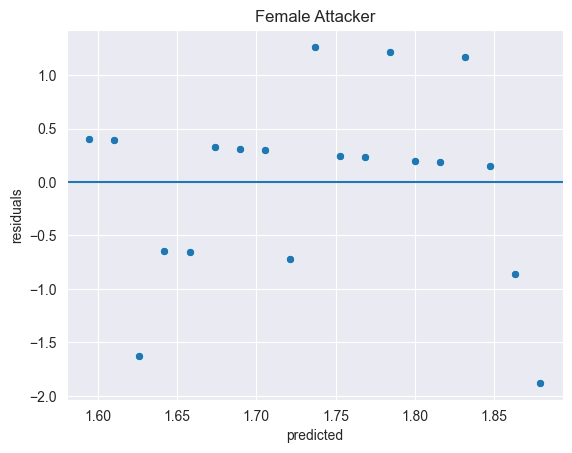

In [104]:
x = injuries_Sorted_Female_Position[["Time Interval"]]
y = injuries_Sorted_Female_Position[["Female Attacker"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x).fit()
reg.resid
injuries_Sorted_Male_Position["predicted"] = reg.predict(x)
injuries_Sorted_Male_Position["residuals"] = reg.resid
sns.scatterplot(data=injuries_Sorted_Male_Position, x="predicted", y="residuals")
plt.title("Female Attacker")
plt.axhline(y=0)